In [62]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from scTools import input, preprocess, process
import os
import anndata as ad
from anndata import AnnData

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [298]:
#Load files
subsample = None
onMac=True

whichTreatment = 1

treatment = ['NonfatVehicle', 'FriedVehicle', 'FriedCRV431', 'FriedLANI', 'FriedCRVLAN']
if onMac:
    pathPrefix='../clusteringResults/'
else:
    pathPrefix = '/media/pmayo/Disc4/scRNA-seq_Gallay2020/clusteringResults/'

adata = (sc.read_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad'))
adata.uns['log1p']["base"] = None

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


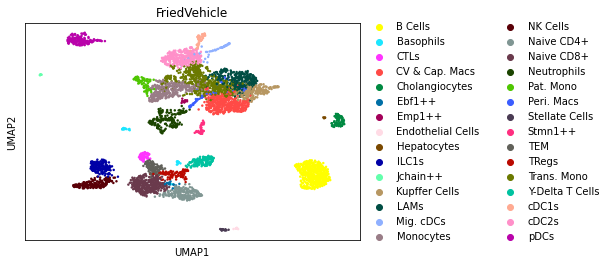

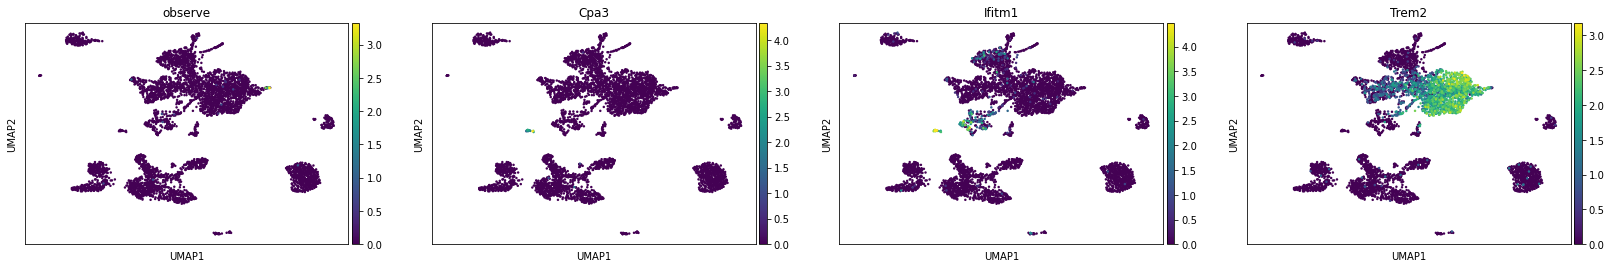

In [301]:
observe = ['Clec4f','Cpa3','Ifitm1','Trem2']

sc.pl.umap(adata, color=['fineClusters'], title=treatment[whichTreatment])
sc.pl.umap(adata, color=observe, title='observe')

In [4]:
### Iterates through all treatment files and gets numbers of each cell type
### into 2 dictionaries.
macroDict={}
coarseDict={}
fineDict={}

for t in treatment:
    macroDict[t]={}
    coarseDict[t]={}
    fineDict[t]={}
    currentData = sc.read_h5ad(pathPrefix + t +'.h5ad')
    for cellType in currentData.obs['macroClusters']:
        if cellType not in macroDict[t].keys():
            macroDict[t][cellType]=0
        macroDict[t][cellType] += 1
    for cellType in currentData.obs['coarseClusters']:
        if cellType not in coarseDict[t].keys():
            coarseDict[t][cellType]=0
        coarseDict[t][cellType] += 1
    for cellType in currentData.obs['fineClusters']:
        if cellType not in fineDict[t].keys():
            fineDict[t][cellType]=0
        fineDict[t][cellType] += 1
        
                         

In [6]:
### Count CellType Instances
Groups = {'B Cells':['B Cells'],
          'Basophils':['Basophils'],
          'Cholangiocytes':['Cholangiocytes'],
          'Endothelial Cells':['Endothelial Cells'],
          'Fibroblasts':['Stellate Cells','VSMCs'],
          'Hepatocytes':['Hepatocytes'],
          'Monocytes':['CV & Cap. Macs','Kupffer Cells','LAMs','Mig. cDCs','Monocytes','Pat. Mono','Peri. Macs','Trans. Mono','cDC1s','cDC2s'],
          'Neutrophils':['Neutrophils'],
          'Other':['Blood','Ccl6++','Cd79a++','Ebf1++','Emp1++','H2-Ab1++','Jchain++','Mir6236++','Stmn1++'],
          'T Cells':['CTLs', 'ILC1s','NK Cells','NKT Cells','Naive CD4+','Naive CD8+','TEM','TRegs','Th1s','Y-Delta T Cells','pDCs'],
}

cellType = "B Cells"
total=0
allTypes = []
for t in treatment:
    for k in fineDict[t].keys():
        if k not in allTypes:
            allTypes.append(k)
print(allTypes)
df = pd.DataFrame(columns=allTypes, index=treatment)
for t in treatment:
    for cellType in allTypes:
        if cellType in fineDict[t].keys(): 
            #print(fineDict[t][cellType])
            df.loc[t,cellType]=fineDict[t][cellType]
        else:
            df.loc[t,cellType]=0

df=df.T
macroGroup = []
for cellType in df.index:
    foundGroup = ''
    for k,v in Groups.items():
        if cellType in v:
            foundGroup = k
    macroGroup.append(foundGroup)
        
    
df['Group'] = macroGroup
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols] 

df['Total'] = df[treatment].sum(axis=1).astype(int)
df=df.sort_values('Group')
df.to_csv('SummaryCellTypes.csv')
#print(df.to_csv('SummaryCellTypes.csv'))

print(df)
print("")
print(df['FriedVehicle'])

['B Cells', 'Blood', 'Naive CD4+', 'pDCs', 'NK Cells', 'Naive CD8+', 'CTLs', 'Y-Delta T Cells', 'Basophils', 'ILC1s', 'Monocytes', 'Peri. Macs', 'Neutrophils', 'LAMs', 'Trans. Mono', 'TEM', 'Emp1++', 'cDC2s', 'cDC1s', 'CV & Cap. Macs', 'Pat. Mono', 'Kupffer Cells', 'Stmn1++', 'Stellate Cells', 'Ebf1++', 'TRegs', 'Cholangiocytes', 'Mig. cDCs', 'Hepatocytes', 'Jchain++', 'Endothelial Cells', 'Cd79a++', 'Mir6236++', 'H2-Ab1++', 'Th1s', 'NKT Cells', 'VSMCs']
                               Group NonfatVehicle FriedVehicle FriedCRV431  \
B Cells                      B Cells          2850          514         583   
Basophils                  Basophils            38           31          24   
Cholangiocytes        Cholangiocytes             0           85          40   
Endothelial Cells  Endothelial Cells             0           10          11   
Stellate Cells           Fibroblasts             0           19           8   
VSMCs                    Fibroblasts             0            0    

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


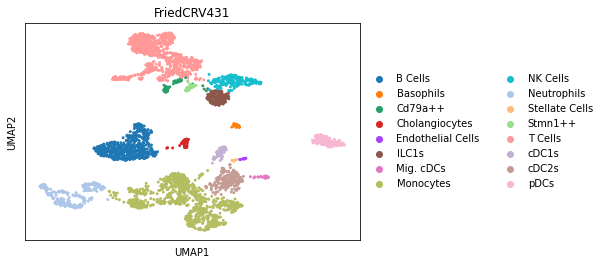

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


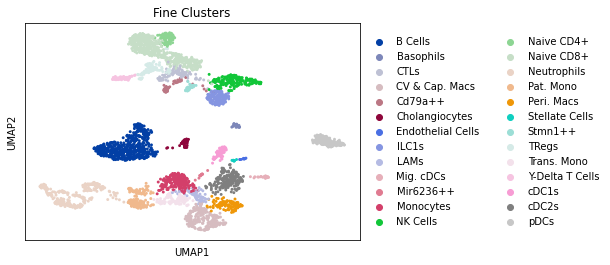

B Cells
583
ILC1s
145
Monocytes
898
NK Cells
186
Neutrophils
249
T Cells
830
cDC1s
67
cDC2s
210
pDCs
154
['B Cells', 'Basophils', 'Cd79a++', 'Cholangiocytes', 'Endothelial Cells', 'ILC1s', 'Mig. cDCs', 'Monocytes', 'NK Cells', 'Neutrophils', 'Stellate Cells', 'Stmn1++', 'T Cells', 'cDC1s', 'cDC2s', 'pDCs']


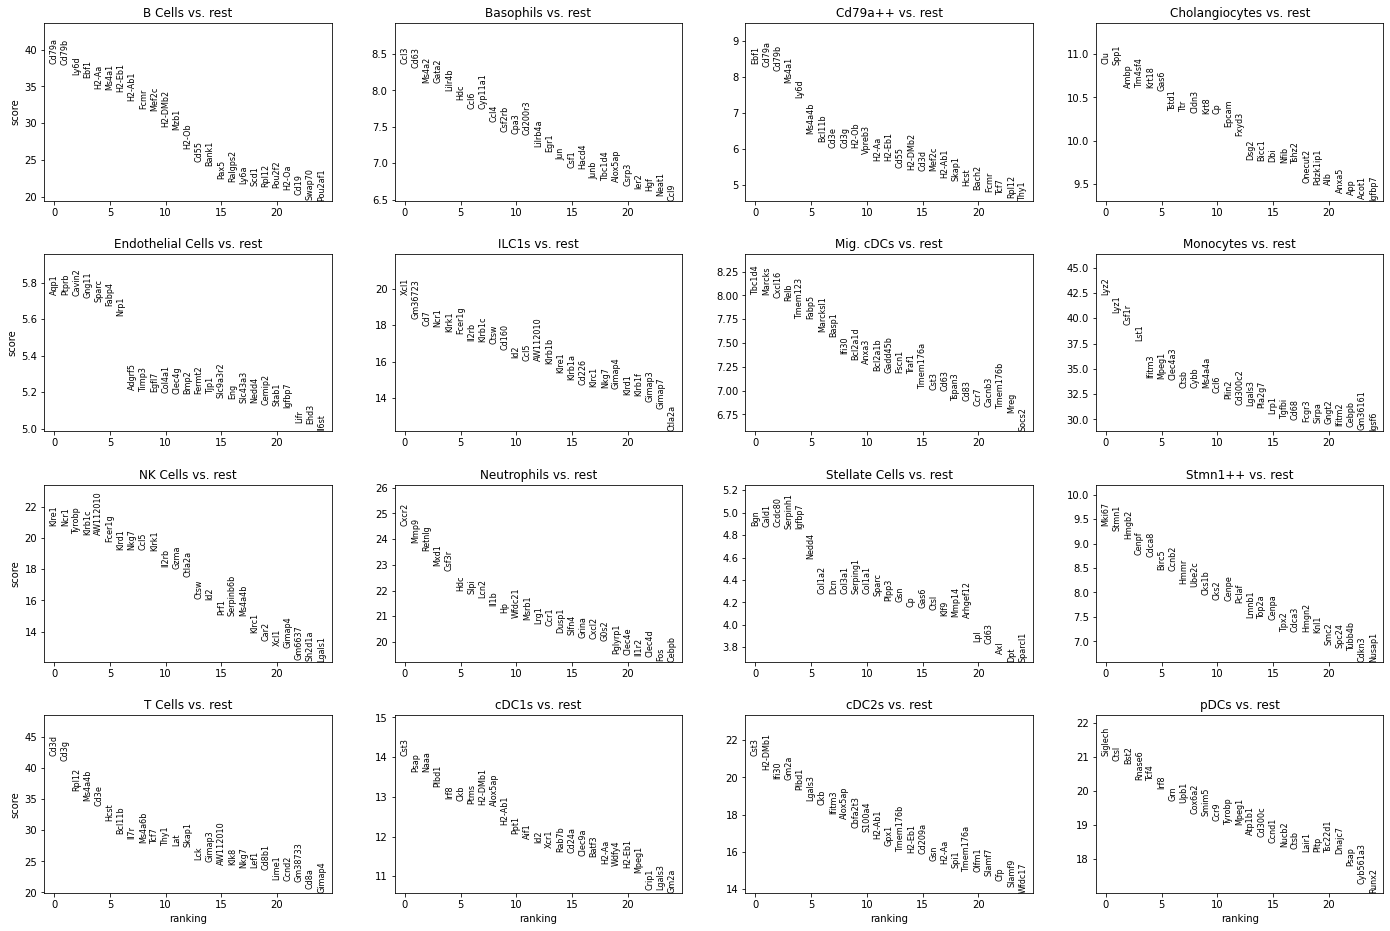

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_anndata.py:2414: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  obs_tidy.index.value_counts(sort=False).iteritems()


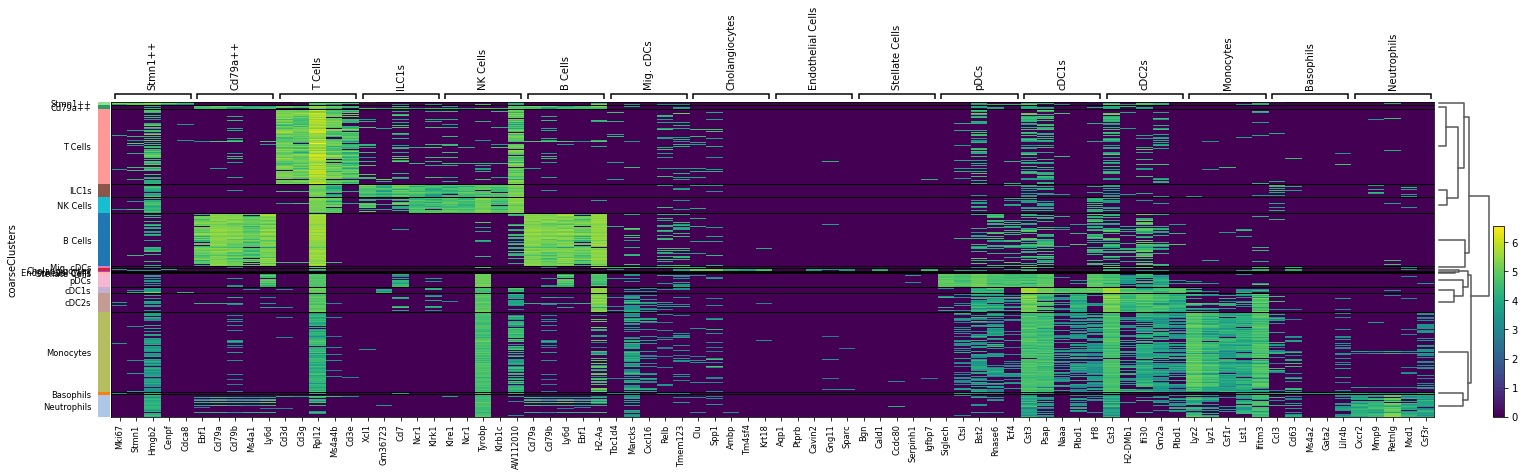

In [27]:
#key='macroClusters'
key='coarseClusters'

ardata = adata.raw.to_adata()
sc.pp.normalize_per_cell(ardata, counts_per_cell_after=1e4)
sc.pp.log1p(ardata)

sc.pl.umap(ardata, color=[key], title=treatment[whichTreatment])
sc.pl.umap(ardata, color=['fineClusters'], title='Fine Clusters')
#sc.pl.umap(ardata, color=[key], legend_loc='on data')
#sc.pl.umap(ardata, color=['fineClusters'], title='Fine Clusters', legend_loc='on data')

groups=[]
for group in np.unique(ardata.obs[key]):
    if ardata[ardata.obs[key]==group].shape[0]>50:
        print(group)
        print(ardata[ardata.obs[key]==group].shape[0])
        groups.append(group)
#ardata=ardata[ardata.obs[key]  ['B Cells','T Cells','ILC1s','Monocytes','NK Cells']]
groups= np.unique(ardata.obs[key])
groups = ['B Cells', 'Basophils', 'Cd79a++', 'Cholangiocytes', 'Endothelial Cells',
 'ILC1s', 'Mig. cDCs', 'Monocytes', 'NK Cells', 'Neutrophils', 'Stellate Cells',
 'Stmn1++', 'T Cells', 'cDC1s', 'cDC2s', 'pDCs']
print(groups)
sc.tl.rank_genes_groups(ardata, 'coarseClusters', method='wilcoxon', use_raw=False, max_iter=2000, pts=False)
sc.pl.rank_genes_groups(ardata, n_genes=25, sharey=False)
sc.tl.dendrogram(ardata, groupby='coarseClusters')
sc.pl.rank_genes_groups_heatmap(ardata, show_gene_labels=True, n_genes=5)
#sc.pl.umap(adata, legend_loc='on data', save='_blank_FriedmanVehicle')
#sc.pl.umap(adata, color=['leiden'], legend_loc=None, title='', save='_color_FriedmanVehicle')

In [263]:
LymphoidCells = ['B Cells', 'pDCs', 'NK Cells', 'NKT Cells', 
                 'T Cells', 'T Cells1', 'T Cell2', 'T Cells3', 'y-delta T Cells',
                'ILC1s', 'NK/ILC1s', '6', '8','10', '9', '12']
MyeloidCells = ['cDC1s', 'cDC2s', 'Mig. cDCs', 'Kupffer Cells', 'Monocytes',
               'Monocytes1', 'Monocytes2', 'Monocytes3', 'Monocytes4', 
               'Macrophage/Monocyte', 'Macrophages', 'cDC1s?', 
                'Myeloid Cells']
CD45s = ['Cholangiocytes', 'Hepatocytes', 'Stellate Cells', 'Fibroblasts',
        'Endothelial Cells', 'Endothelial/Fibrotic Cells', 'Cholangiocytes/Fibroblasts',"Endothelial/Stromal Cells", "Fibrotic Cells?"]
custom = ['Monocytes']


In [264]:
key = 'coarseClusters'
print(np.unique(adata.obs[key]))
adata.obs['Lymph'] = [True if x in LymphoidCells else False for x in adata.obs[key]]
adata.obs['Myeloid'] = [True if x in MyeloidCells else False for x in adata.obs[key]]
adata.obs['CD45'] = [True if x in CD45s else False for x in adata.obs[key]]

lymphAdata = adata[adata.obs[key].isin(LymphoidCells)]
myeloidAdata = adata[adata.obs[key].isin(MyeloidCells)]
CD45Adata = adata[adata.obs[key].isin(CD45s)]
customAdata = adata[adata.obs[key].isin(custom)]

fineData = customAdata
print(np.unique(fineData.obs[key]))

['B Cells' 'Basophils' 'Cholangiocytes' 'Endothelial Cells' 'Hepatocytes'
 'ILC1s' 'Mig cDCs' 'Monocytes' 'NK Cells' 'Neutrophils' 'Stellate Cells'
 'Stmn1++' 'T Cells' 'VSMCs' 'cDC1s' 'cDC2s' 'pDCs']
['Monocytes']


/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


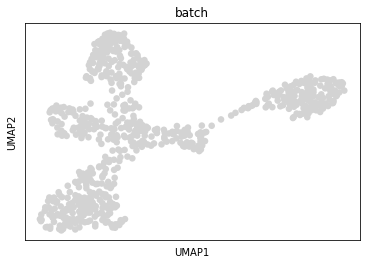

In [265]:

#sc.pp.neighbors(lymphAdata, n_neighbors=15, n_pcs=40)
#sc.tl.umap(lymphAdata)
preprocess.umapify(fineData)

#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


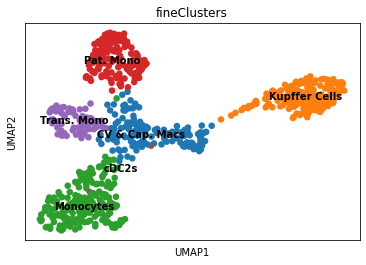

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


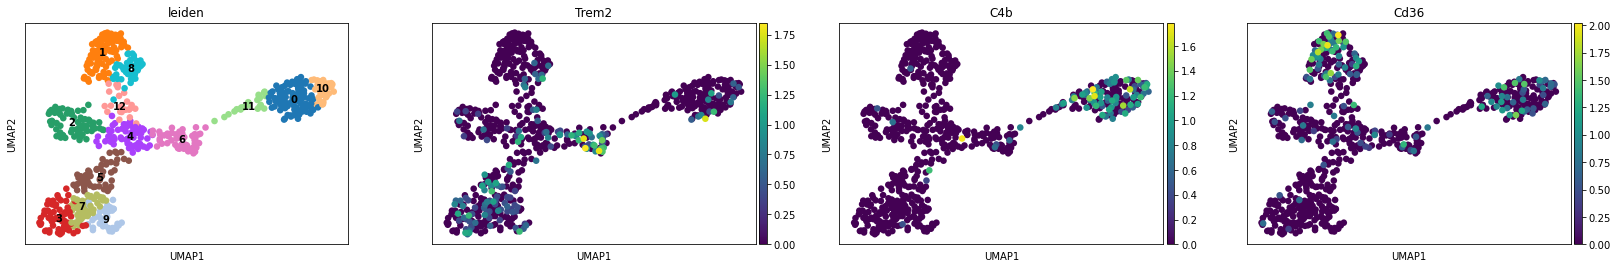

In [271]:
sc.tl.leiden(fineData, resolution=1.5)
sc.pl.umap(fineData, color=['fineClusters'], legend_loc='on data')
sc.pl.umap(fineData, color=['leiden', 'Trem2','C4b' ,'Cd36'], legend_loc='on data')
#sc.tl.rank_genes_groups(fineData, 'leiden', method='logreg', max_iter=2000)
sc.tl.rank_genes_groups(fineData, 'leiden', method='wilcoxon', max_iter=2000)

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


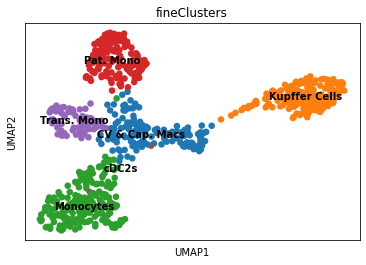

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


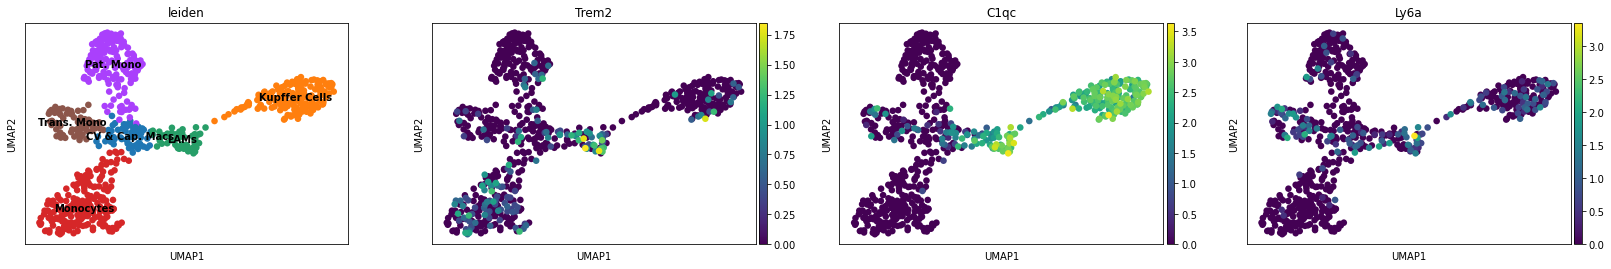

In [282]:
#sc.pl.umap(lymphAdata, color=['leiden'], legend_loc='on data')

#leiden = lymphAdata.obs['leiden'].map({x:('Other' if x=='9' else x) for x in lymphAdata.obs['leiden']})
#lymphAdata.obs['leiden'] = leiden
sc.pl.umap(fineData, color=['fineClusters'], legend_loc='on data')
toHighlight=['leiden','Trem2','C1qc','Ly6a']
sc.pl.umap(fineData, color=toHighlight, title=toHighlight, legend_loc='on data')


In [281]:
process.replaceClusters('Trans. Mono', ['2'], fineData, key='leiden')
#process.replaceClusters('Cd79a++', ['18'], adata, key='coarseClusters')

Cluster 12


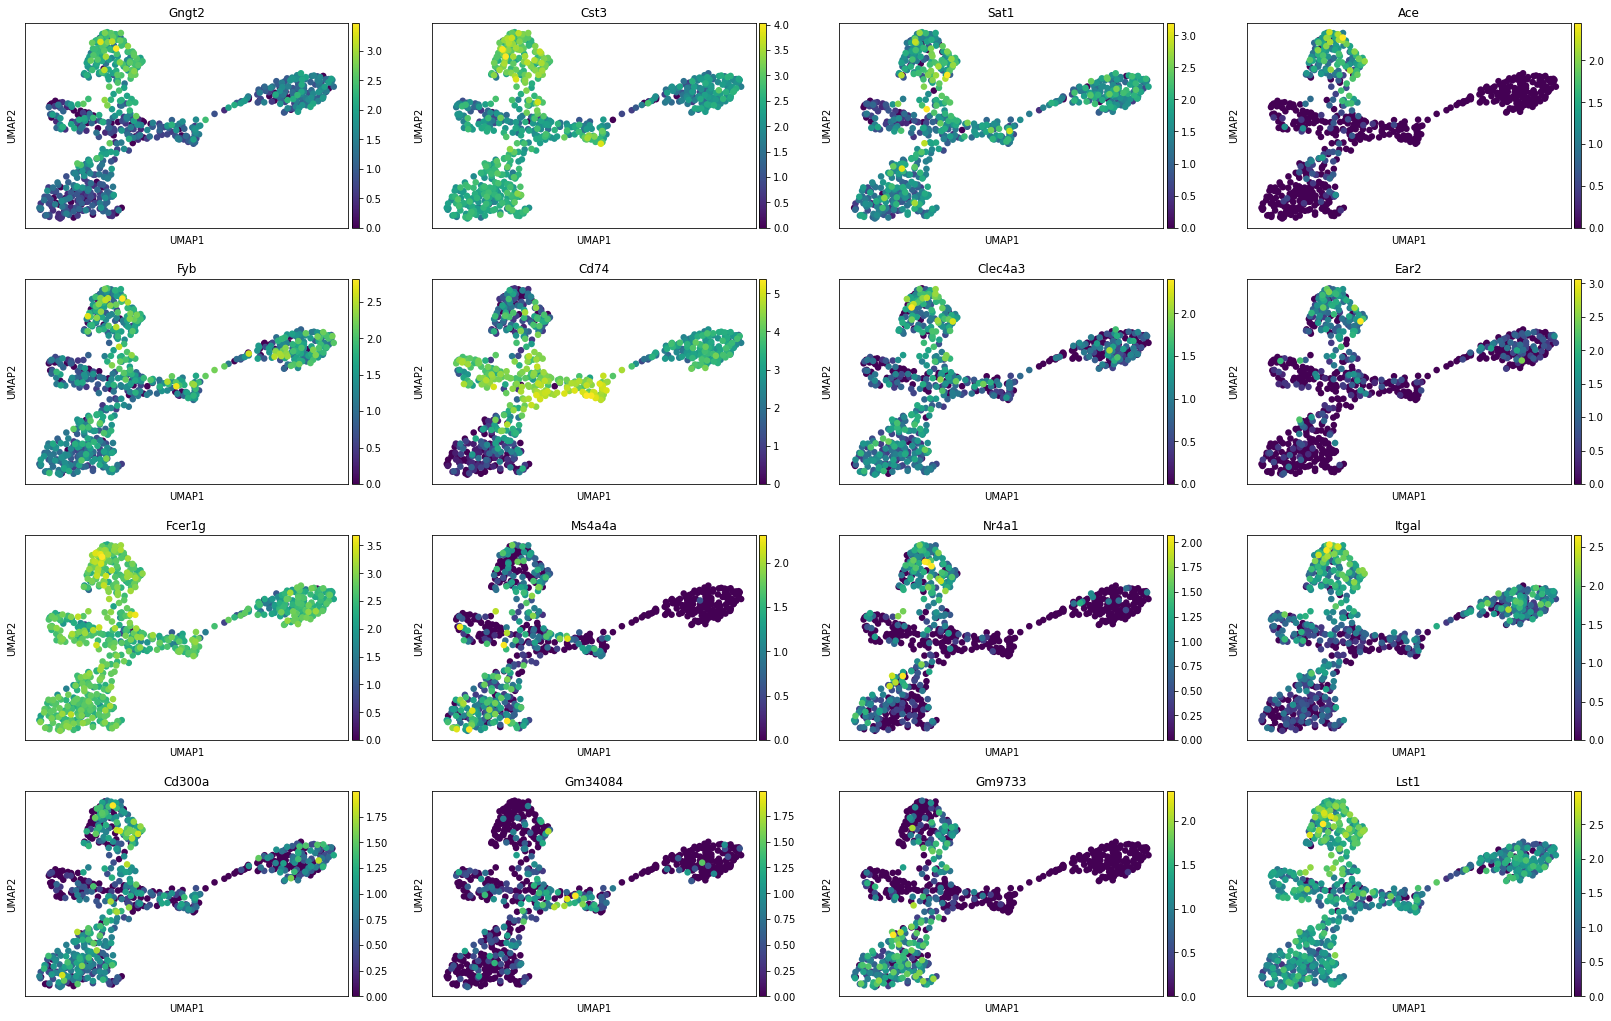

Cluster 2


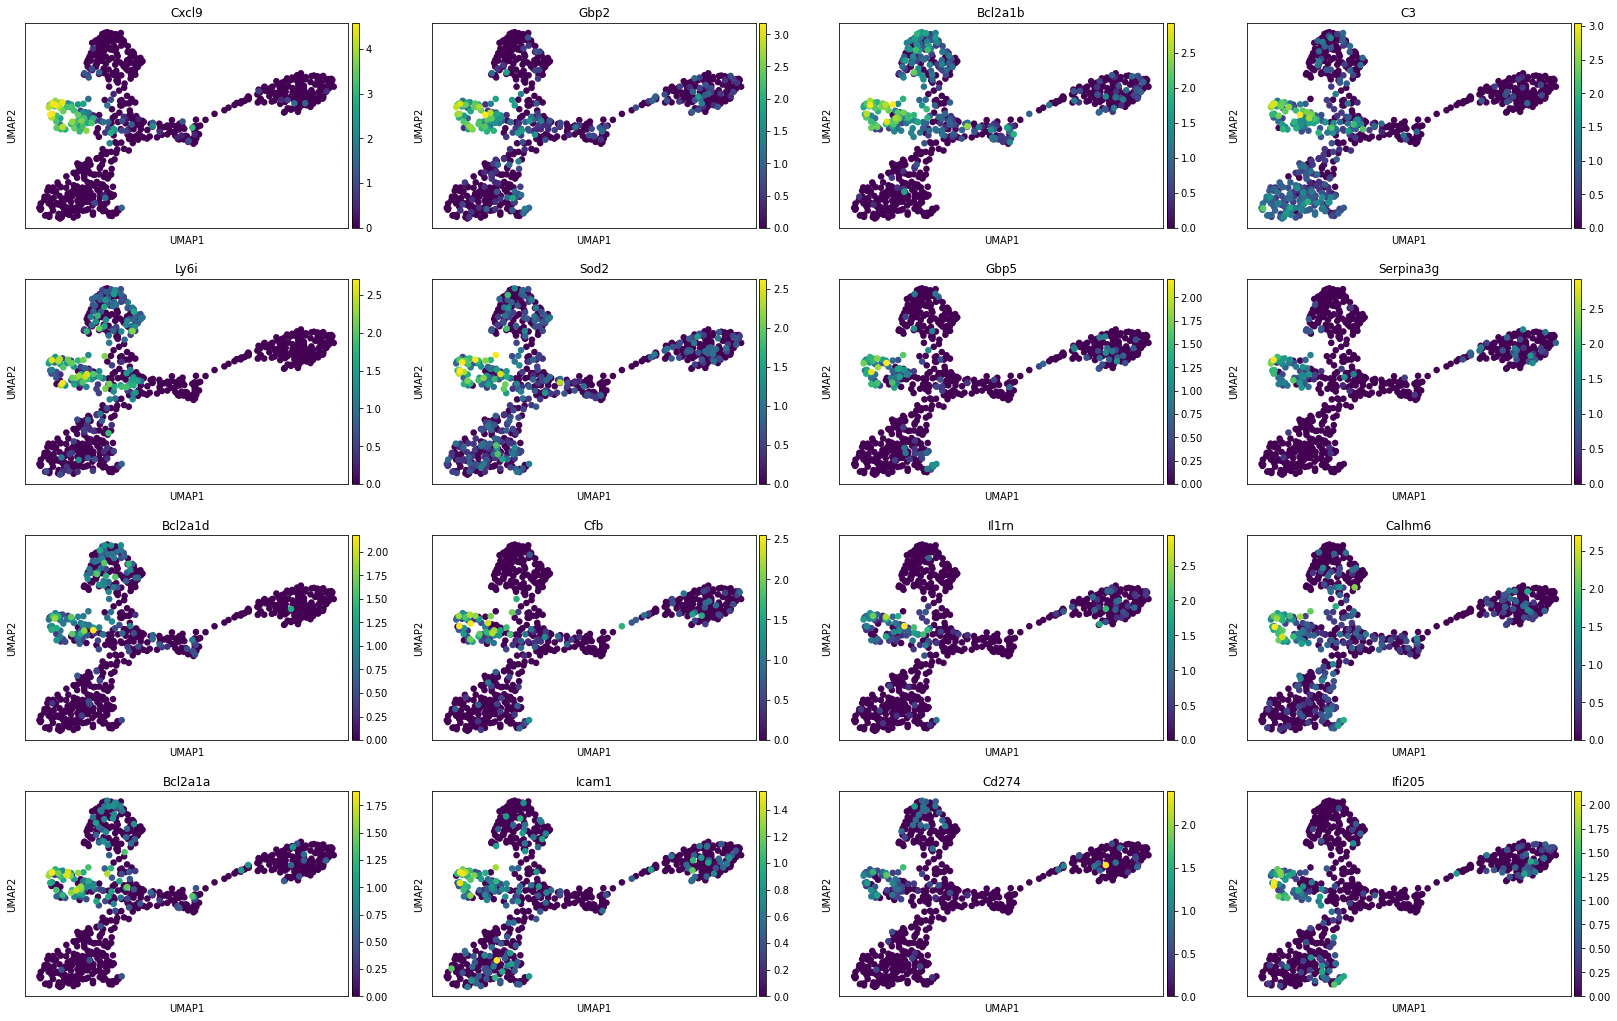

Cluster CV & Cap. Macs


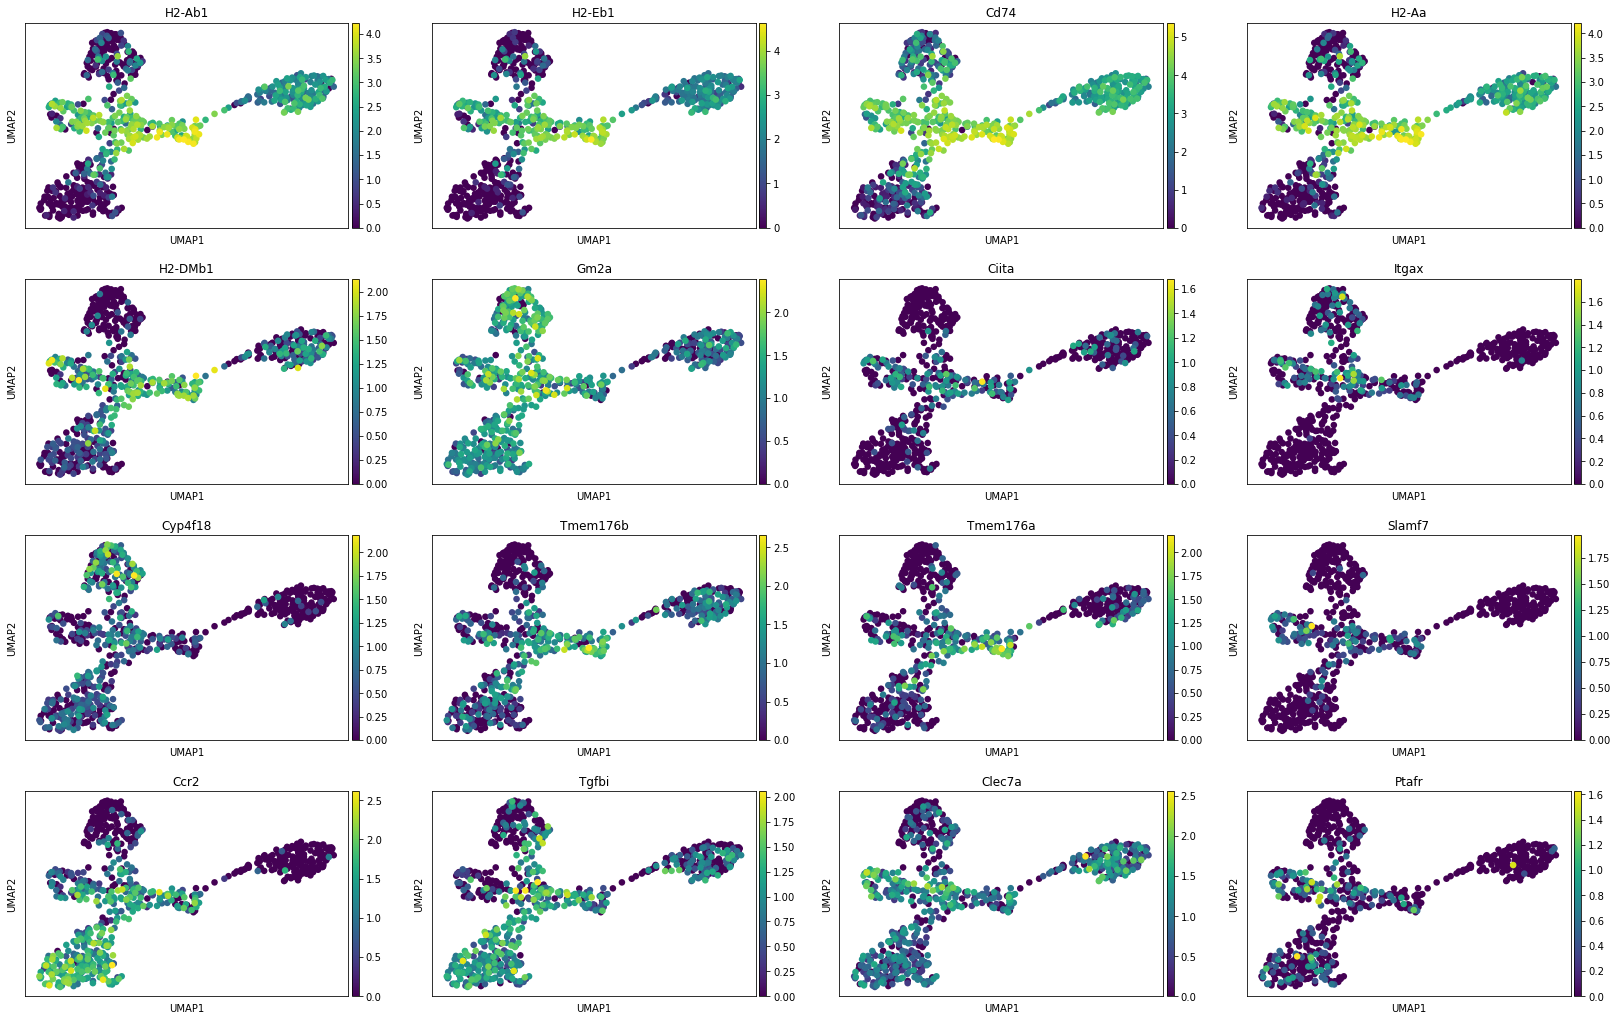

Cluster Kupffer Cells


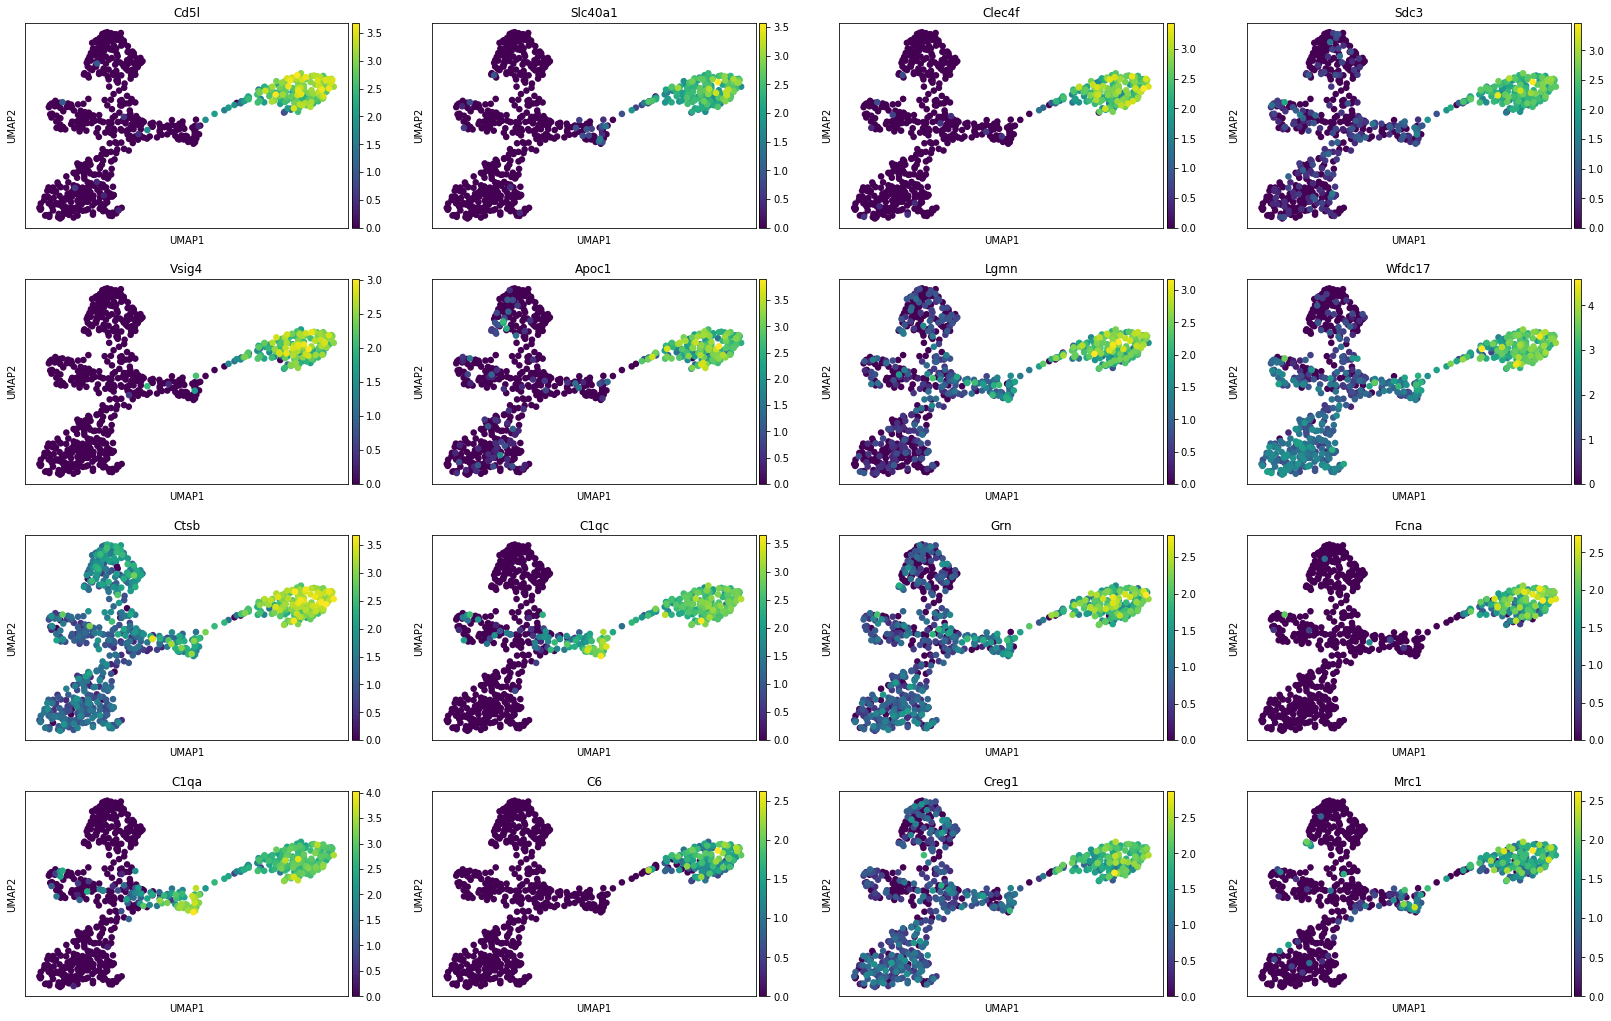

Cluster LAMs


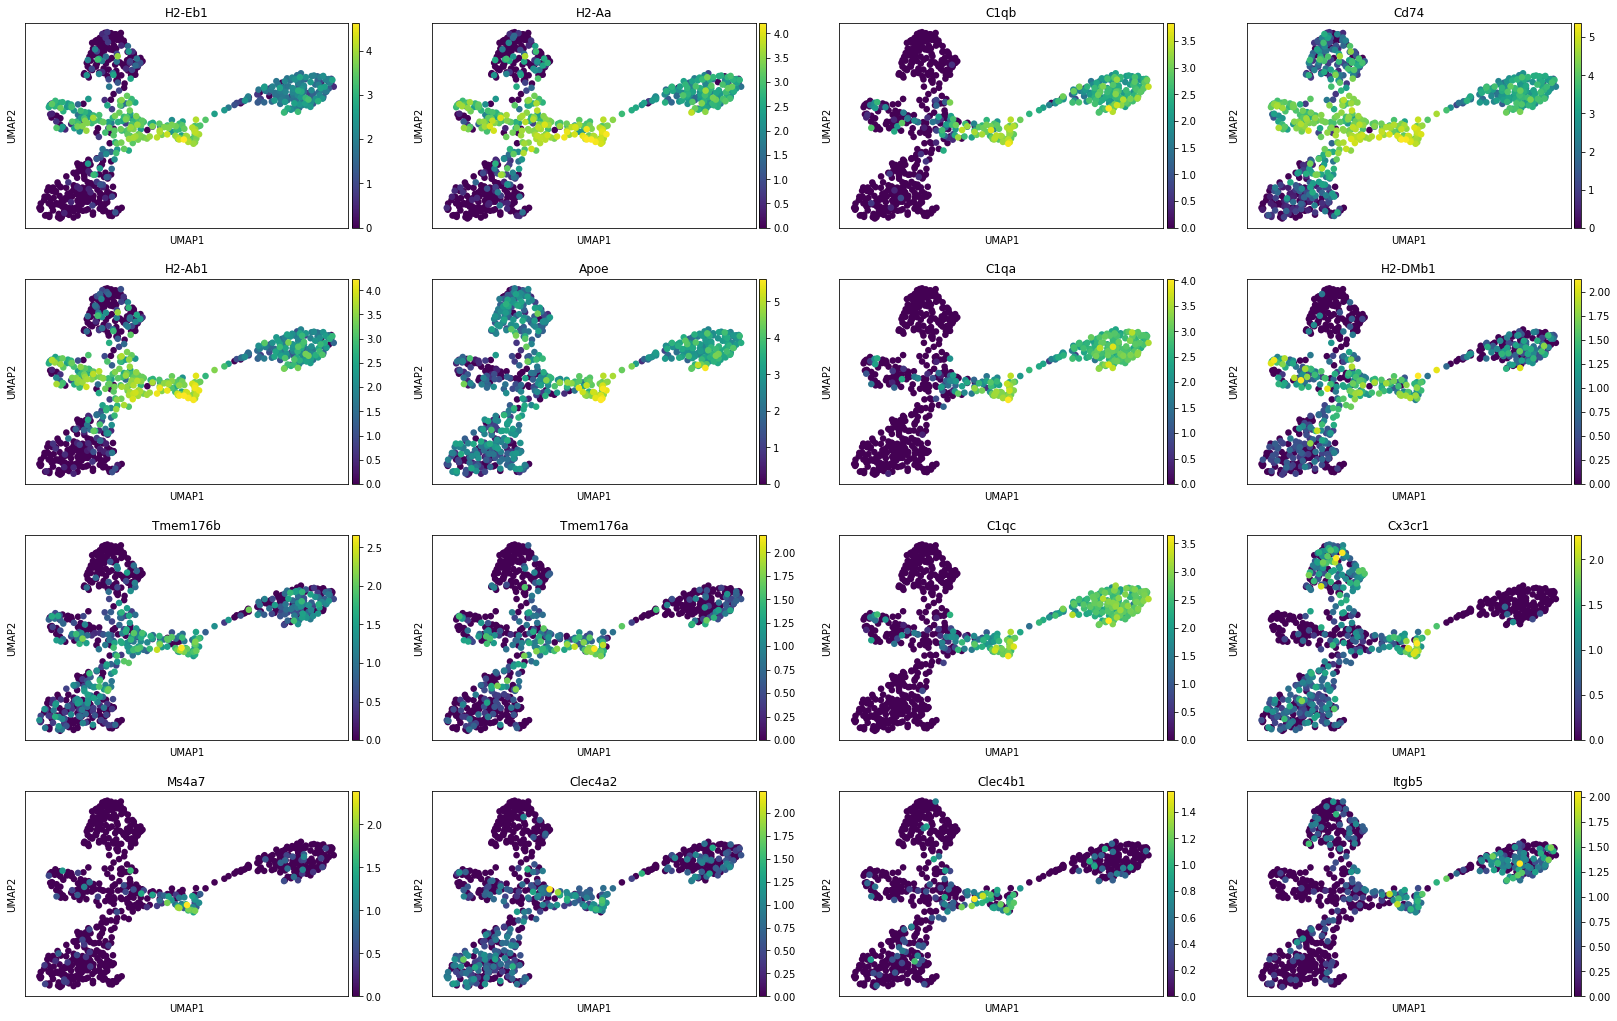

Cluster Monocytes


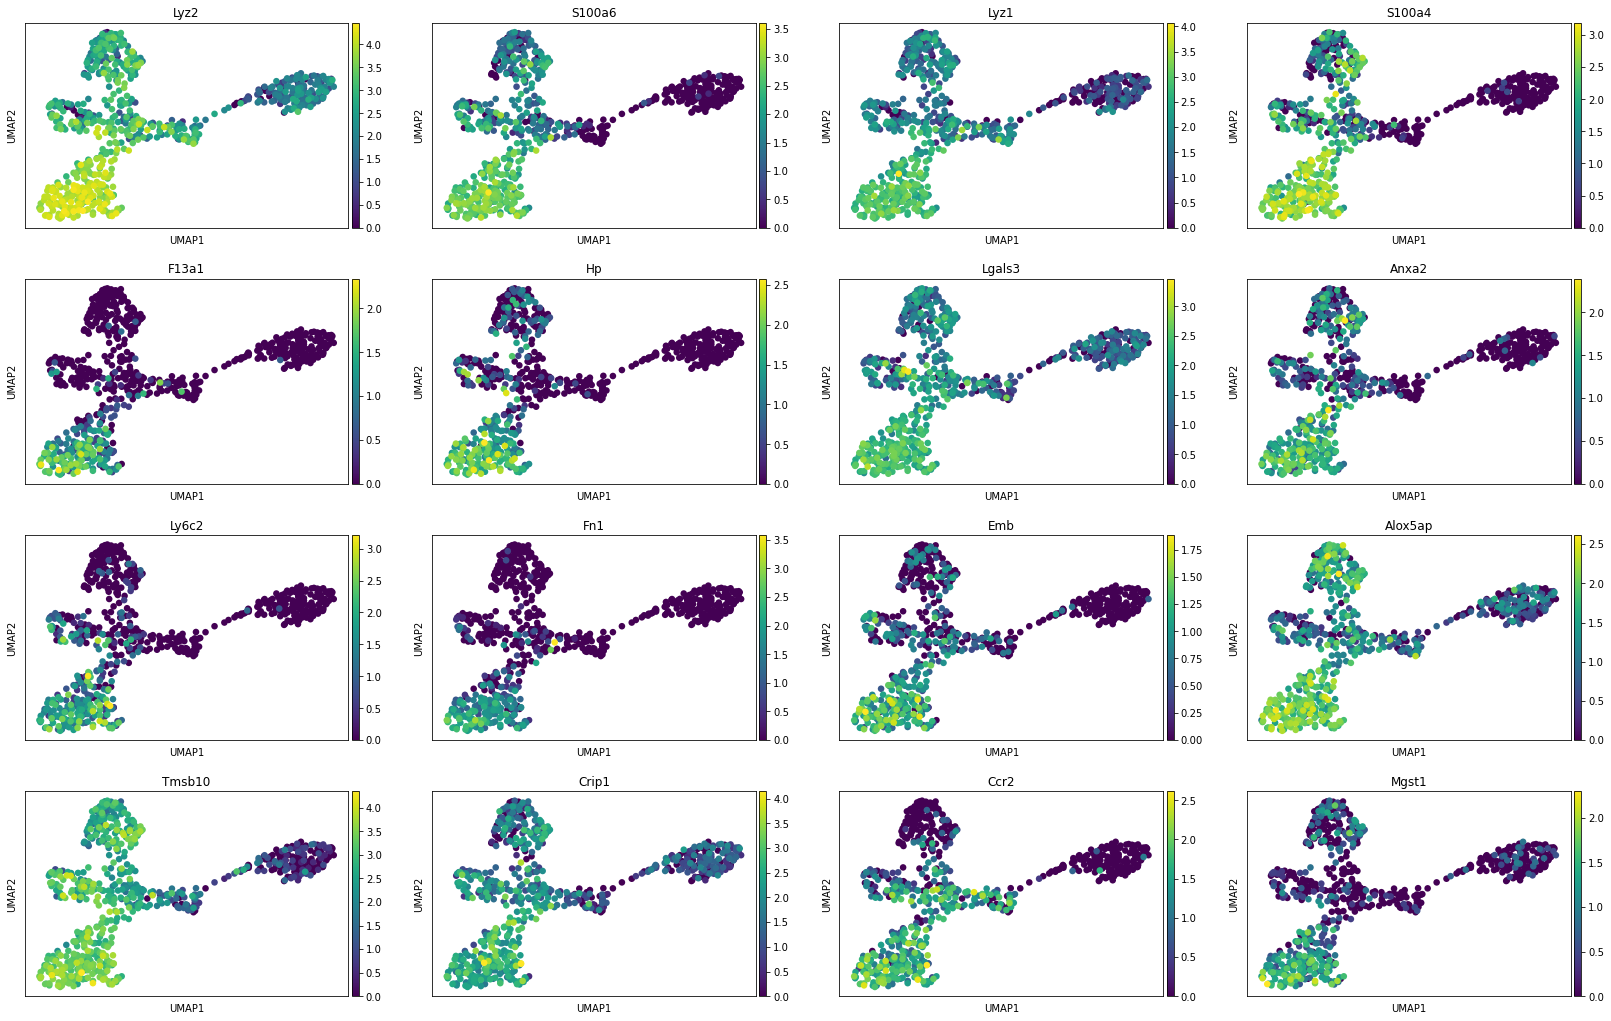

Cluster Pat. Mono


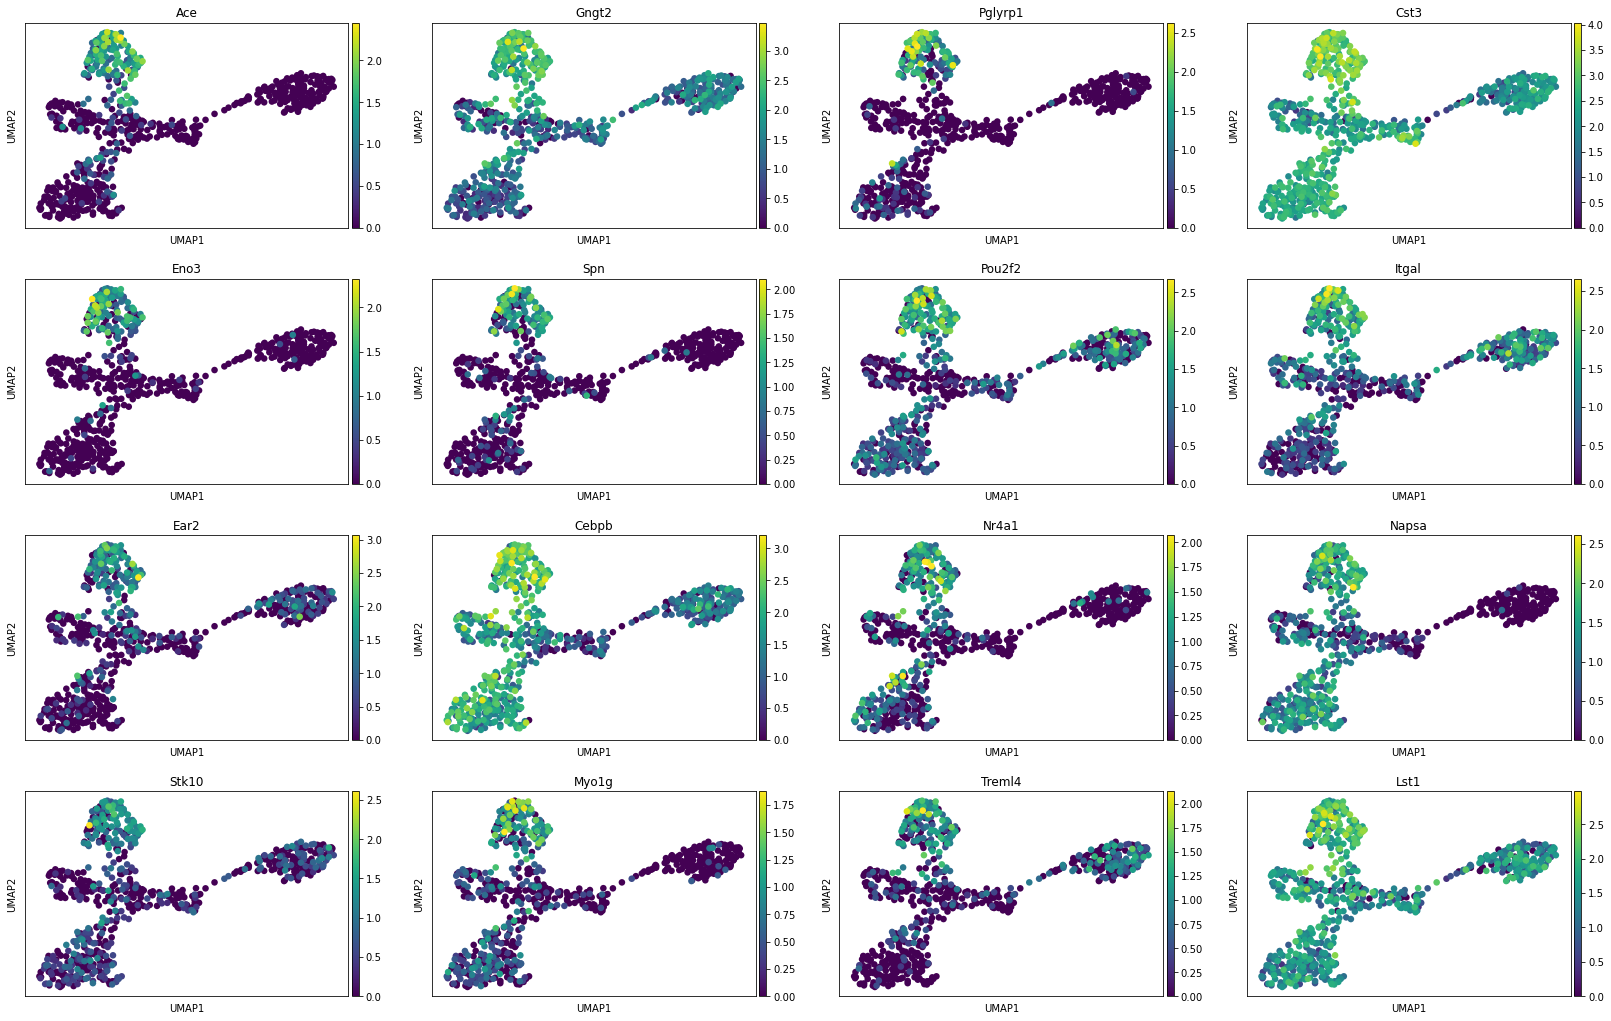

In [279]:
# print(('fineClusters' not in adata.obs))
sc.tl.rank_genes_groups(fineData, 'leiden', method='wilcoxon', max_iter=2000)
for cluster in np.unique(fineData.obs['leiden']):
    print(f"Cluster {cluster}")
    sc.pl.umap(fineData, color=fineData.uns['rank_genes_groups']['names'][str(cluster)][:16])

#newClusterNames = ['B Cells','B Cells2','Naive CD8+','Naive CD4+','CTLs','5','6','Y-Delta T Cells', '8', '9']
#lymphAdata.rename_categories('leiden', newClusterNames)


Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing CV & Cap. Macs for LAMs
Changing C

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


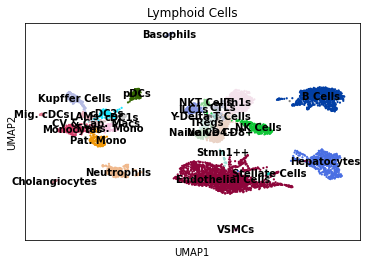

In [288]:
do=True
fineLabelToReplaceCoarse='LAMs'
coarseLabelToGive='LAMs'
key='fineClusters'

if 'fineClusters' not in adata.obs:
    adata.obs['fineClusters'] = adata.obs['coarseClusters']
if do:
    newFine = process.subClusters(adata, coarseLabel=coarseLabelToGive, fineLabel=fineLabelToReplaceCoarse,
                                  fineData=fineData, coarseKey=key, fineKey='leiden')
    #saver = adata.obs['coarseClusters'].copy()
    adata.obs[key] = newFine
    sc.pl.umap(adata, color=[key], title='Lymphoid Cells', legend_loc='on data')

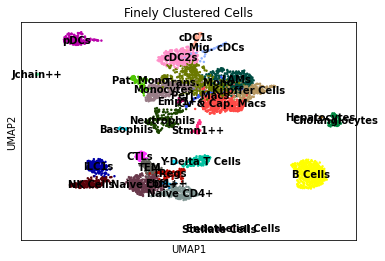

In [103]:
### Add fine-tuning to adata
if 'fineClusters' not in adata.obs:
    adata.obs['fineClusters'] = adata.obs['coarseClusters']
newFineClusters=[]
for cell in adata.obs.index:
    if cell in fineData.obs.index:
        newFineClusters.append(fineData.obs['leiden'][cell])
    else:
        newFineClusters.append(adata.obs['fineClusters'][cell]) 
#print(newFineClusters)
adata.obs['fineClusters']=newFineClusters
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')


/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


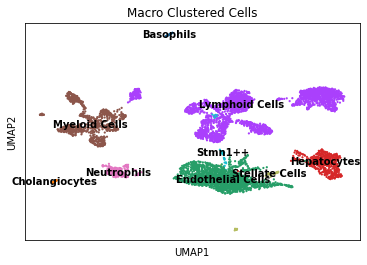

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


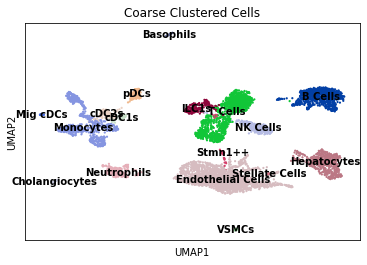

/Users/JackBrons/miniconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


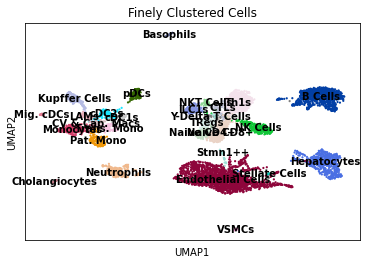

In [289]:
#process.replaceClusters('Endothelial Cells', ['14'], adata, key='coarseClusters')
sc.pl.umap(adata, color=['macroClusters'], title='Macro Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['coarseClusters'], title='Coarse Clustered Cells', legend_loc='on data')
sc.pl.umap(adata, color=['fineClusters'], title='Finely Clustered Cells', legend_loc='on data')


In [290]:
print(f"Saving {pathPrefix + treatment[whichTreatment] +'.h5ad'}")
#adata.write_h5ad('/.h5ad')
adata.write_h5ad(pathPrefix + treatment[whichTreatment] +'.h5ad')

Saving ../clusteringResults/FriedCRVLAN.h5ad


In [291]:
saveLabels = True
if saveLabels:
    prefix = '/Volumes/Expansion/Hepion/Data/'
    adata.obs['coarseClusters'].to_csv(prefix+treatment[whichTreatment]+'/coarseClusters.csv')
    adata.obs['fineClusters'].to_csv(prefix+treatment[whichTreatment]+'/fineClusters.csv')